In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

from dmba import regressionSummary

import matplotlib.pylab as plt

In [ ]:
data_df = pd.read_csv('.../resource/lib/public/candy_production.csv')

In [ ]:
# Check the first 10 rows

???

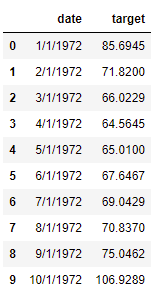

In [ ]:
# Check the last 10 rows

???

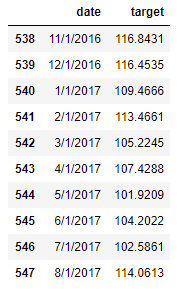

In [ ]:
# Show the variable names, non-null counts, and datatypes

???

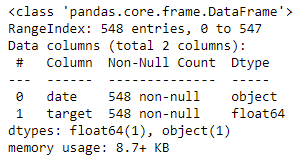

In [ ]:
# Convert the date string into a datetime object in Python

data_df['date'] = pd.to_datetime(data_df['???'])

In [ ]:
# Show the first five rows of the date column

???

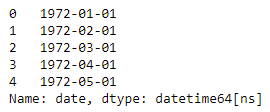

In [ ]:
# Check the datatypes again

???

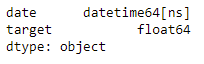

In [ ]:
# Extract underlying data from the date variable

data_df['year'] = data_df['date'].dt.???
data_df['month'] = data_df['date'].dt.???
data_df['day'] = data_df['date'].dt.???
data_df['weekday'] = data_df['date'].dt.???

In [ ]:
# Create a new plotting object and load the time series data into it

data_ts = pd.Series(data_df.target.values, index=data_df.date)

In [ ]:
# Display a line chart of the time series data

%matplotlib inline

data_ts.plot(ylim=[0, 180], 
               legend=False, 
               figsize=[10, 6], 
               color='darkorange')

plt.xlabel('Year')  # set x-axis label
plt.ylabel('Production')  # set y-axis label

plt.tight_layout()
plt.show()

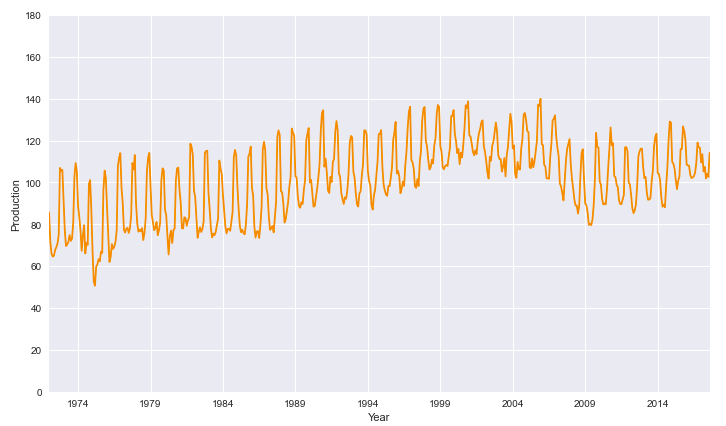

#### Create two new variables that are required by Prophet

In [ ]:
# Create two new variables, 'ds' and 'y' to match with Prophet's requirements
# Prophet will extract these two from the dataframe without any further feature selection

data_df[???] = data_df['date']
data_df[???] = data_df['target']

#### Use the 'year' variable to create training and test datasets

In [ ]:
# Create training and test data (training = all years less than 2010)

train_data = data_df[data_df['year']<2010]
test_data = data_df[data_df['year']>=2010]

print(train_data.shape)
print(test_data.shape)

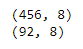

In [ ]:
# Load the Prophet alogorithm and plotting elements

from fbprophet import Prophet
from fbprophet.plot import plot_plotly

import plotly.offline as py
py.init_notebook_mode()

### Our first time series model

In [ ]:
# Create a fitted time series model

prophet_model_1 = Prophet()

prophet_model_1.add_country_holidays(country_name='US')

prophet_model_1.???(???)

In [ ]:
# Let's check out the US holidays

prophet_model_1.train_holiday_names

#### Generate 1 year's worth of predictions

In [ ]:
# Make places in the dataframe to hold two months of future data

future = prophet_model_1.make_future_dataframe(periods=60, freq='m')

future.tail(15)

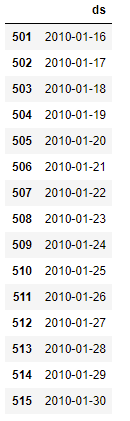

In [ ]:
# Create a set of predictions for the one year period

forecast_1 = prophet_model_1.???(future)

In [ ]:
# Plot the actual and predicted series

fig1 = prophet_model_1.plot(???)

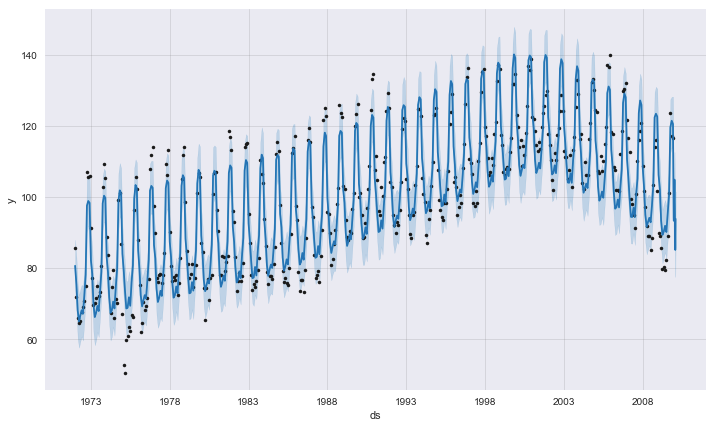

In [ ]:
# Plot the components (year and monthly)

fig1 = prophet_model_1.plot_components(???)

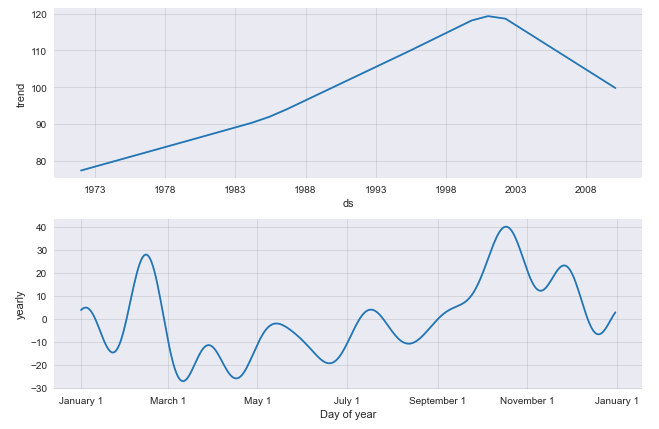

In [ ]:
# Display the changepoints identified by Prophet

from fbprophet.plot import add_changepoints_to_plot

fig = prophet_model_1.plot(forecast_1)

a = add_changepoints_to_plot(fig.gca(), prophet_model_1, forecast_1)

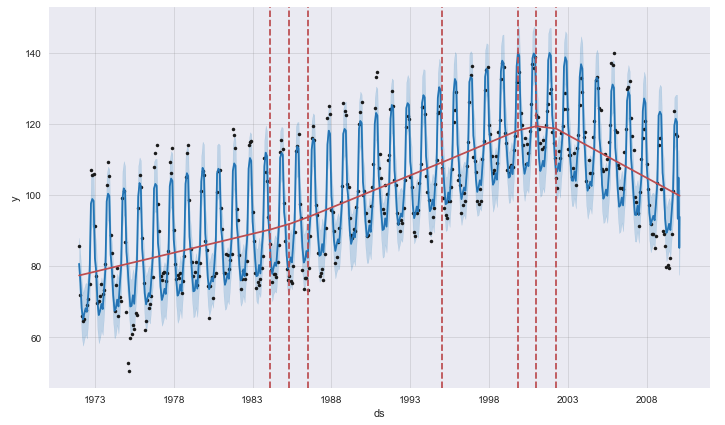

In [ ]:
# List the dates of the changepoints

prophet_model_1.changepoints

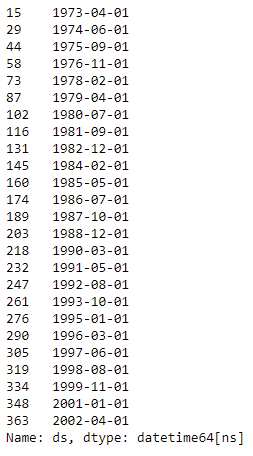

### Create a second prophet model but with limited changepoints

In [ ]:
# Create a fitted new model with limited changepoints and with fitting and prediction in a single line of code

prophet_model_2 = Prophet(n_changepoints=???)

forecast_2 = prophet_model_2.???(train_data).???(future)

In [ ]:
# Display the changepoints identified by Prophet

fig = prophet_model_2.plot(???);

a = add_changepoints_to_plot(fig.gca(), prophet_model_2, ???)

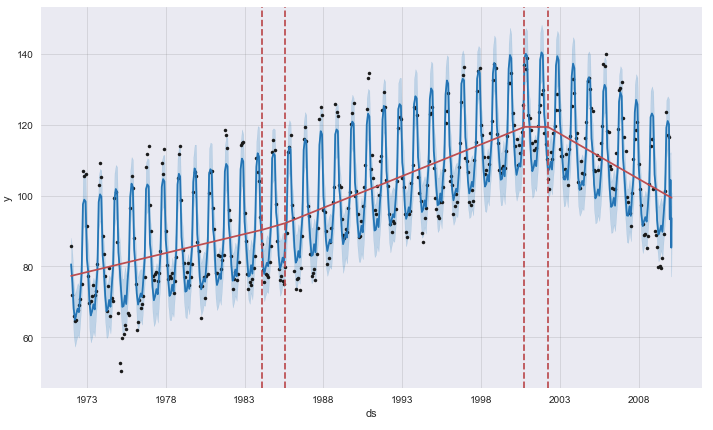

In [ ]:
# Make a prediction on the test data

prediction_2 = prophet_model_2.???(???)

prophet_model_2.plot(???)

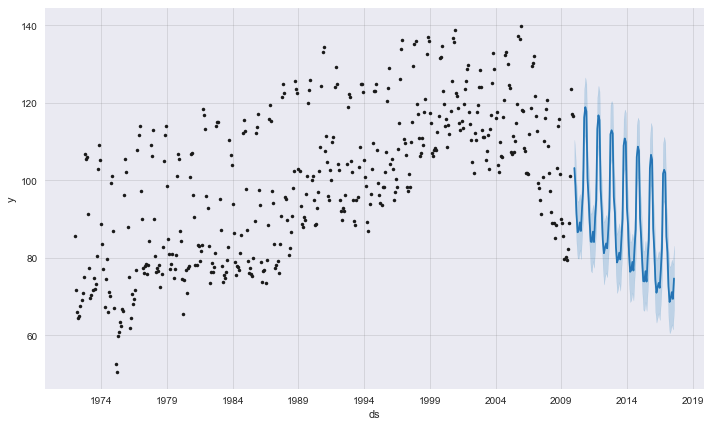

In [ ]:
# What's inside the prediction_2 model? Let's check it out.

prediction_2.head()

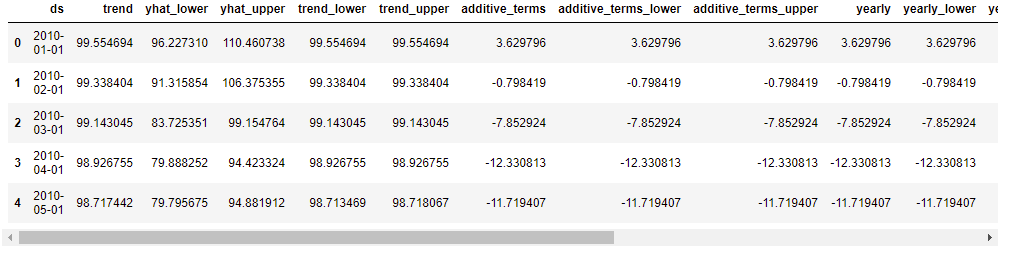

### Turn predictions and actual test values into numpy vectors by extracting values only

In [ ]:
yhat_2 = prediction_2['yhat'].values # convert to numpy from pandas by extracting values alone

target = test_data['y'].values 

### Compute the Mean Directional Accuracy for prophet model 2

In [ ]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

mda(target, yhat_2)

### Compute the regression summary for prophet model_2

In [ ]:
regressionSummary(???, ???)

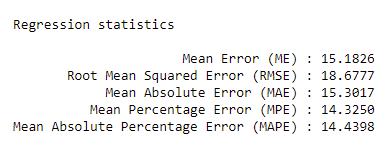

In [ ]:
forecast_error_2 = (target - yhat_2)

forecast_error_2

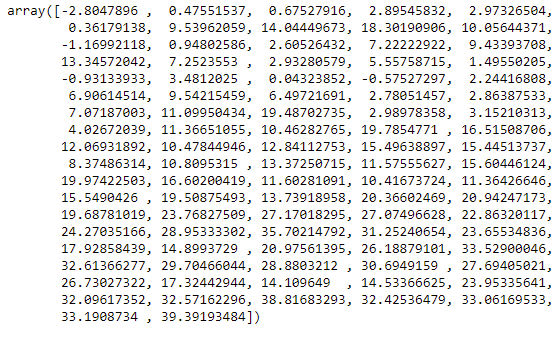

### Making a Tunable Time Series Model (model_3)

In [ ]:
# Create a fit a new model with limited changepoints

prophet_model_3 = Prophet(changepoint_prior_scale=???)

forecast_3 = prophet_model_3.fit(???).predict(???)

In [ ]:
fig3 = prophet_model_3.plot(forecast_3)

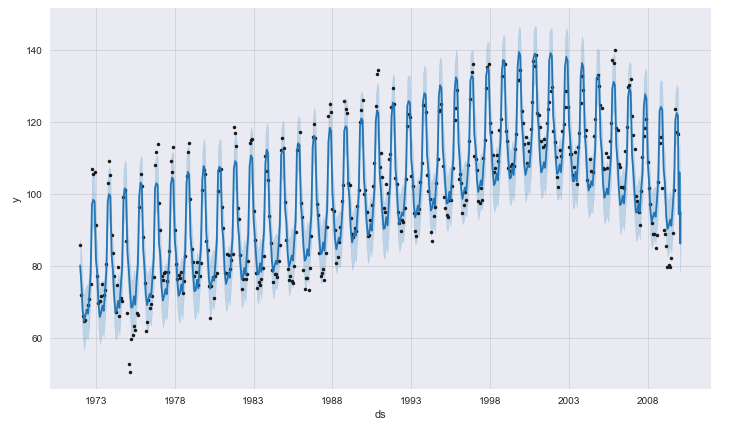

In [ ]:
prediction_3 = prophet_model_3.predict(test_data)

prophet_model_3.plot(prediction_3)

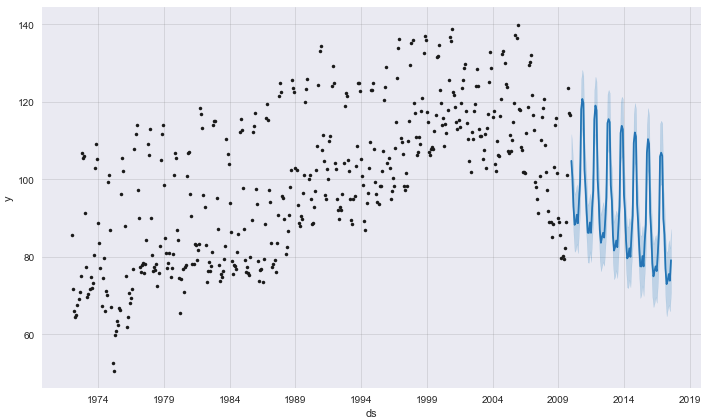

In [ ]:
yhat_3 = prediction_3['yhat'].values # convert to numpy from pandas by extracting values alone

target = test_data['y'].values 

### Compute the Mean Directional Accuracy

In [ ]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

mda(target, yhat_3)

### Display the regression performance summary

In [ ]:
regressionSummary(target, yhat_3)

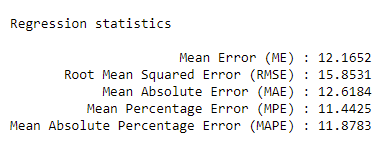